## Подготовка

### Загрузка библиотек

In [1]:
!pip install  imbalanced-learn==0.9

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 199 kB 5.2 MB/s 
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.1
    Uninstalling imbalanced-learn-0.8.1:
      Successfully uninstalled imbalanced-learn-0.8.1


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
import numpy as np

%matplotlib inline

from sklearn.pipeline import make_pipeline

# Борьба с дисбалансом
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier

### Загрузка функций

### Загрузка файлов

In [3]:
# Доступ к файлам на colab
import glob
import os

# Библиотека для работы с google drive
from google.colab import drive

# Монтируем диск
drive.mount('/content/drive')

# Смотрим файлы в директории
# !ls "/content/drive/My Drive/Colab Notebooks"

Mounted at /content/drive


In [4]:
# Меняем домашнюю директорию
# для доступа к датасетам
os.chdir("/content/drive/My Drive/Colab Notebooks/Цифровой прорыв - Новосиб")

In [5]:
df_train = pd.read_csv("train_dataset_train.csv")
df_test = pd.read_csv("test_dataset_test.csv")

## ТЕСТ

In [11]:
features = [ 'Northing', 'Easting', 
            'Height', 'Reflectance',  
            'combine_north_east', 'height_north_east']
target = 'Class'

# Для обучения берем подвыборку большого датасета
# ml_data = df_train.sample(1000000)
ml_data = df_train

# Добавляем новый признак
for df in [ml_data, df_test]:
  df['combine_north_east'] = df['Easting'] + df['Northing'] 
  df['height_north_east'] = df['Height'] + df['combine_north_east']

In [12]:
print("Исходный баланс классов в обучающей выборке")
weights_smote = ml_data[target].value_counts().to_dict()
weights_smote

Исходный баланс классов в обучающей выборке


{0: 2731040, 3: 1287816, 4: 103453, 5: 55985, 1: 39384, 64: 4416}

In [13]:
print("Целевой баланс классов для SMOTE")
weights_smote[64] = weights_smote[4]
weights_smote[1] = weights_smote[4]
weights_smote[5] = weights_smote[4]
weights_smote

Целевой баланс классов для SMOTE


{0: 2731040, 3: 1287816, 4: 103453, 5: 103453, 1: 103453, 64: 103453}

In [14]:
model = BalancedRandomForestClassifier(
    n_estimators=120,                                       
    bootstrap=False,
    max_features=3)

clf = imblearn.pipeline.Pipeline([    
      ('SMOTE', SMOTE(random_state=12, 
                      sampling_strategy=weights_smote,
                      k_neighbors=13)),       
      ('model', model)
])

clf.fit(ml_data[features], ml_data[target])
predictions = clf.predict(df_test[features])

df_test[target] = predictions
df_test[['id', target]].to_csv("test_predictions.csv", sep=",", index=False)

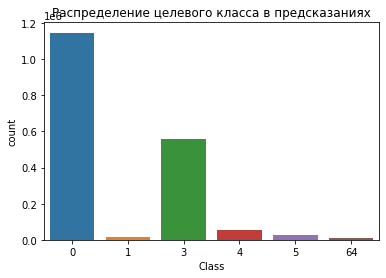

In [15]:
sns.countplot(x = target, data  = df_test).set_title('Распределение целевого класса в предсказаниях');

Баланс классов в предсказаниях сохранен!